# INTRODUCTION

In today's market, many companies have a mobile presence. Often, these companies provide free products/services in their mobile apps in an attempt to transition their customers to a paid membership. Some examples of paid products, which originate from free ones, are YouTube Red, Pandora Premium. Audible Subscription, and You Need a Budget. Since marketing efforts are never free, these companies need to know exactly who to target with offers and promotions.

* Market: The target audience is customers who use a company's free product. In this case study, this refers to users who installed (and used) the company's free mobile app.

* Product: The paid memberships often provide enhanced versions of the free products already given for free, alongside new features. For example, Youtube Red allows you to leave the app while still listening to a video.

* Goal: The objective of this model is to predict which users will not subscribe to the paid membership, so that greater marketing efforts can go into trying to "convert" them to paid users.

# BUSINESS CHALLENGE

* In this Case Study we will be working for a fintech company that wants to provide its customers with a paid mobile app subscription that will allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked.

* The company has tasked you to identify which users will most likely NOT enroll in the paid product, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

# DATA

* By working for the company, we have access to each customer's app behavior data. This data allows us to see the date and time of app installation, as well as the features the users engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.

* The app usage data is only from the user's first day in the app. This limitation exists because users can enjoy a 24-hour free trial of the premium features, and the company wants to target them with new offers shortly after the trial is over.

In [1]:
#import all the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import time

In [2]:
#import the data set using pandas
df = pd.read_csv(r"/kaggle/input/app-data/new_appdata10.csv")

In [3]:
#Check the data set how its look
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
 df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Data Cleaning
df['hour'] = df.hour.str.slice(1,3).astype(int)

In [6]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [7]:
#create a copy of dataset
df_temp = df.copy().drop(columns = ["user","screen_list","enrolled_date","enrolled","first_open"])

In [8]:
df_temp.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


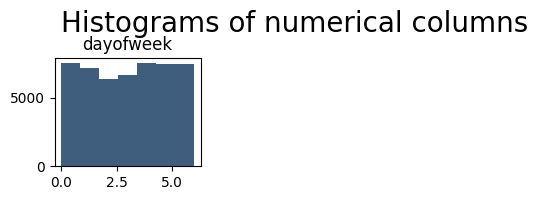

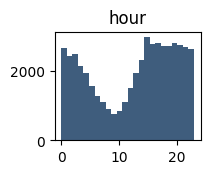

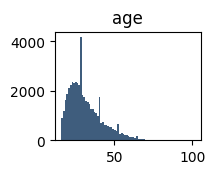

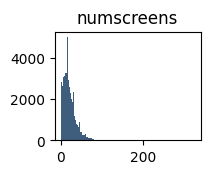

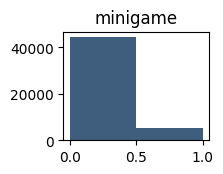

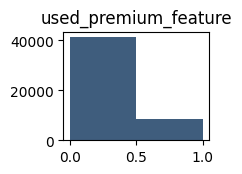

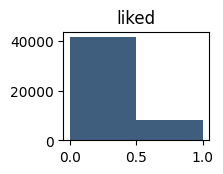

In [9]:
#Create a Histogram
plt.suptitle("Histograms of numerical columns", fontsize = 20)
for i in range(1, df_temp.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df_temp.columns.values[i - 1])
    
    vals = np.size(df_temp.iloc[:,i-1].unique())
    plt.hist(df_temp.iloc[:,i-1],bins = vals, color = '#3F5D7D')
    plt.show()

<Axes: title={'center': 'Correlation with Response Variable'}>

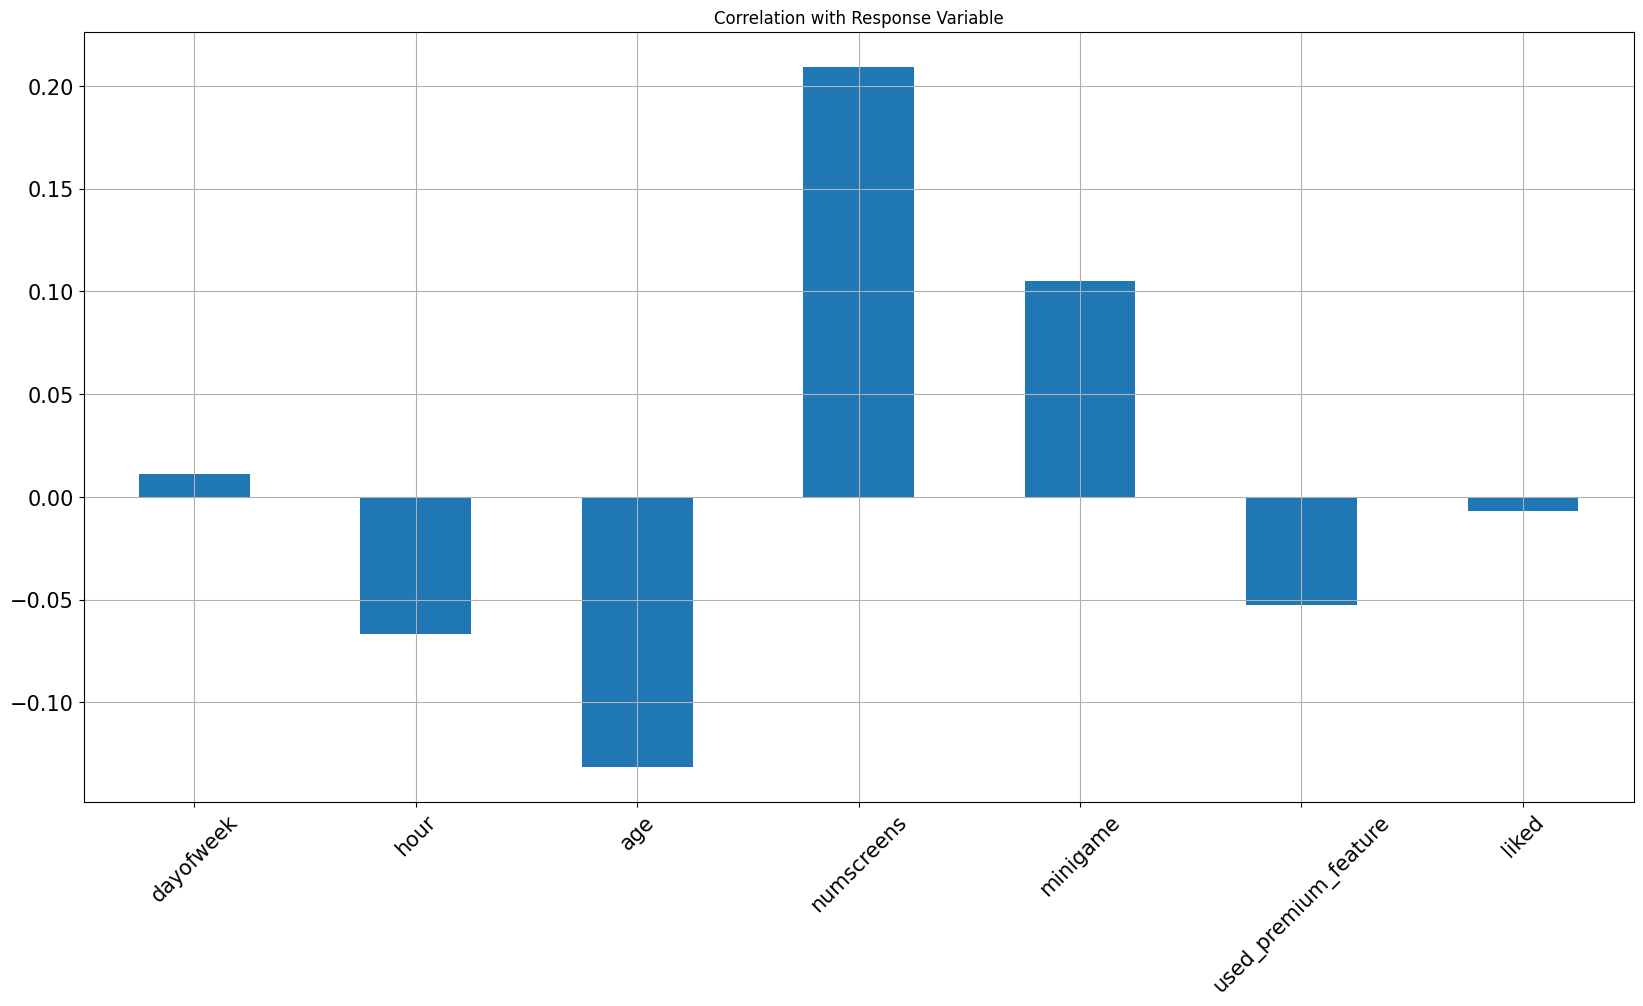

In [10]:
#Correlation with Responses
df_temp.corrwith(df["enrolled"]).plot.bar(figsize=(20,10), 
                                          title ="Correlation with Response Variable",
                                         fontsize = 15,
                                         rot =45,
                                         grid = True)

<Axes: >

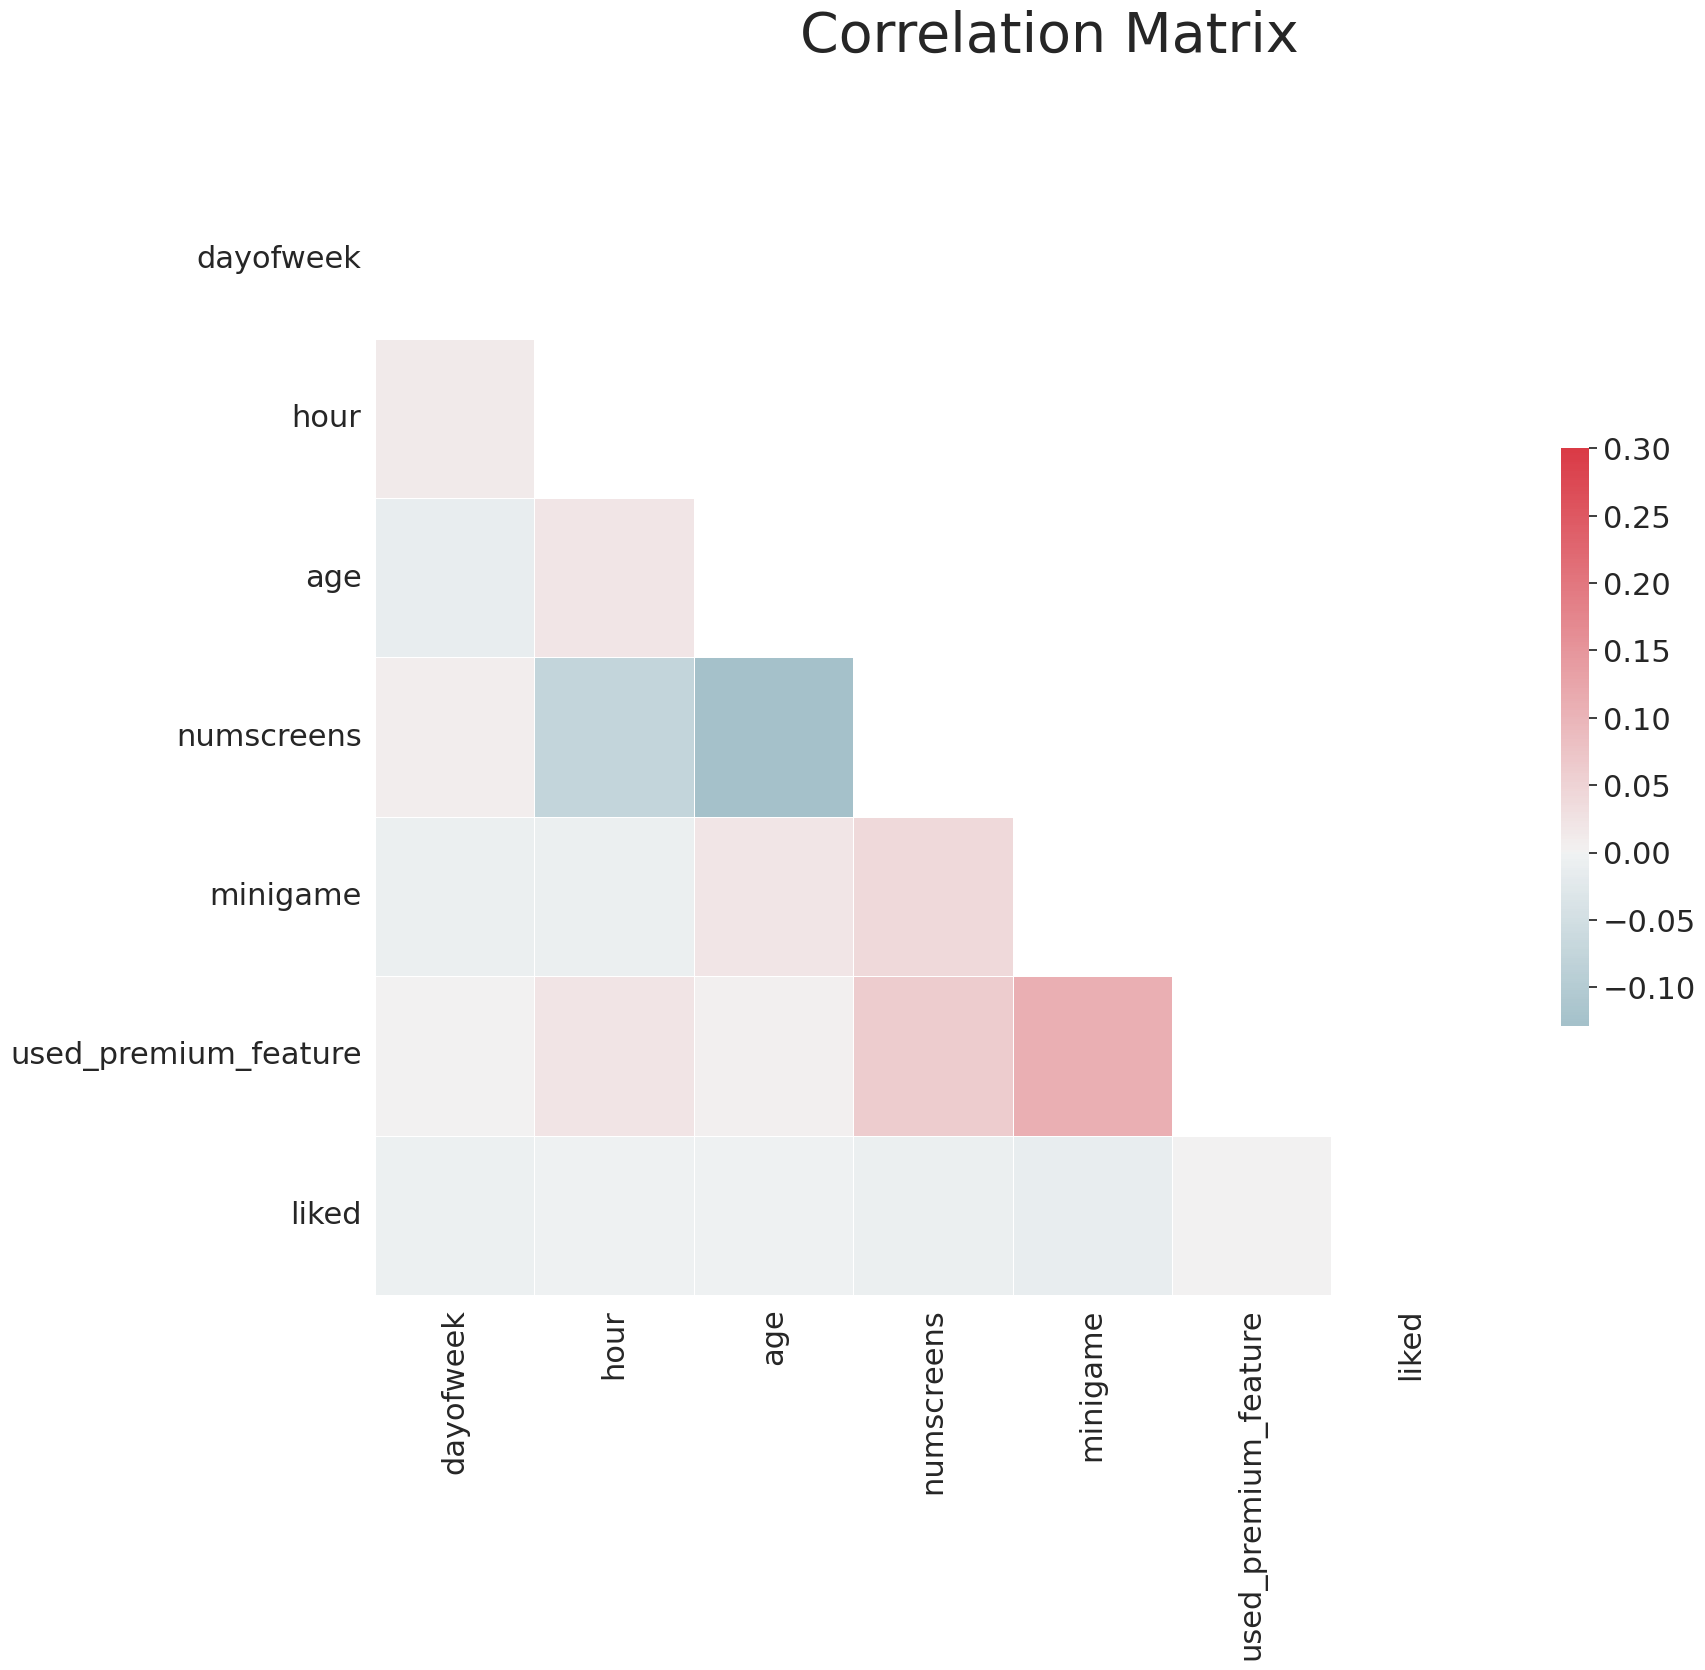

In [11]:
#Correlation matrix
sns.set(style = 'white', font_scale =2)

#Compute Correlation Matrix
corr = df_temp.corr()

#Genarte a mask for the upper triangle
mask = np.zeros_like(corr,dtype = np.bool_)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
fig, axes = plt.subplots(figsize = (18,15))
fig.suptitle("Correlation Matrix", fontsize = 40)

#Generate a custome diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap = True)

#Draw the heatmap with the mask an correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths =0.5, cbar_kws = {"shrink": 0.5} )

In [12]:
#Feature Engineering 
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
df['first_open'] = [parser.parse(row_data) for row_data in df['first_open']]
df['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in df['enrolled_date']]
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [14]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
df["diff"] = (df["enrolled_date"] - df["first_open"])
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,diff
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaT
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaT
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaT
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0 days 00:03:03.159000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0 days 00:05:49.180000


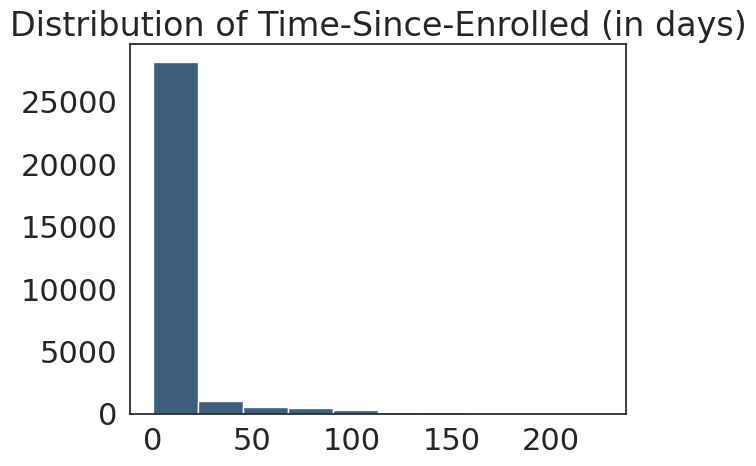

In [16]:
# Assuming 'diff' is a timedelta column, convert it to total days
df['diff_days'] = df['diff'].dt.total_seconds() / (24 * 3600)  # Convert to days

# Plot the histogram
plt.hist(df['diff_days'].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled (in days)')
plt.show()


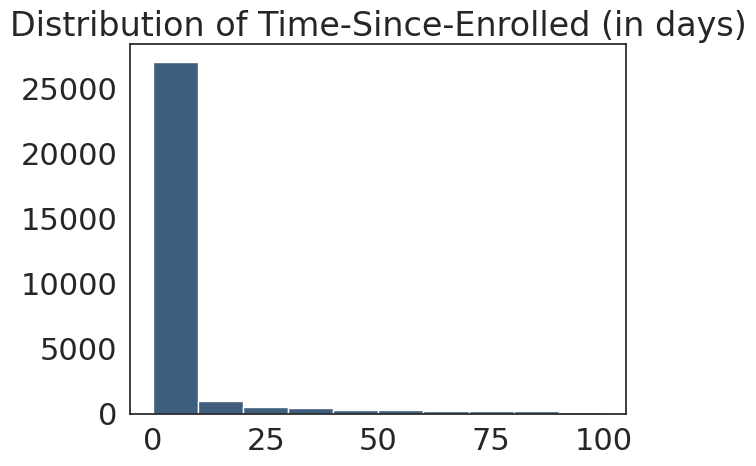

In [17]:
# Plot the histogram
plt.hist(df['diff_days'].dropna(), color='#3F5D7D',range = [0,100])
plt.title('Distribution of Time-Since-Enrolled (in days)')
plt.show()

In [18]:
df.loc[df['diff_days'] >48, 'enrolled'] =  0

In [19]:
df = df.drop(columns = ["diff_days","enrolled_date","first_open","diff"])

In [20]:
df.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [21]:
df_screen = pd.read_csv(r"/kaggle/input/top-screens/top_screens.csv")["top_screens"].values
df['screen_list'] = df['screen_list'].astype(str) + ','

In [22]:
for sc in df_screen:
    df[sc] = df['screen_list'].str.contains(sc).astype(int)
    df['screen_list'] = df['screen_list'].str.replace(sc + ",", "")

In [23]:
df['Other'] = df['screen_list'].str.count(',')
df = df.drop(columns = ["screen_list"])

In [24]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

In [25]:
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)



In [26]:
# #### Saving Results ####
df.head()


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [27]:
df.describe()


,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.585840,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.492581,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [28]:
df.columns



Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [29]:
df.to_csv('new_appdata10.csv', index = False)

# Model Building

In [30]:
df = pd.read_csv(r"/kaggle/working/new_appdata10.csv")

In [31]:
response = df['enrolled']

In [32]:
df = df.drop(columns = 'enrolled')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, response, test_size = 0.25, random_state = 42)

In [34]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [37]:
#Model Building
from sklearn.linear_model import LogisticRegression

In [38]:
classifier = LogisticRegression(random_state = 42, penalty = 'l1',solver='liblinear')
classifier.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [39]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [41]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[3509, 1789],
       [1354, 5848]])

In [42]:
 accuracy_score(y_test,y_pred)

0.74856

In [43]:
precision_score(y_test, y_pred)

0.7657457116668849

In [44]:
recall_score(y_test,y_pred)

0.8119966675923355

In [45]:
f1_score(y_test,y_pred)

0.7881932744794123

<Axes: >

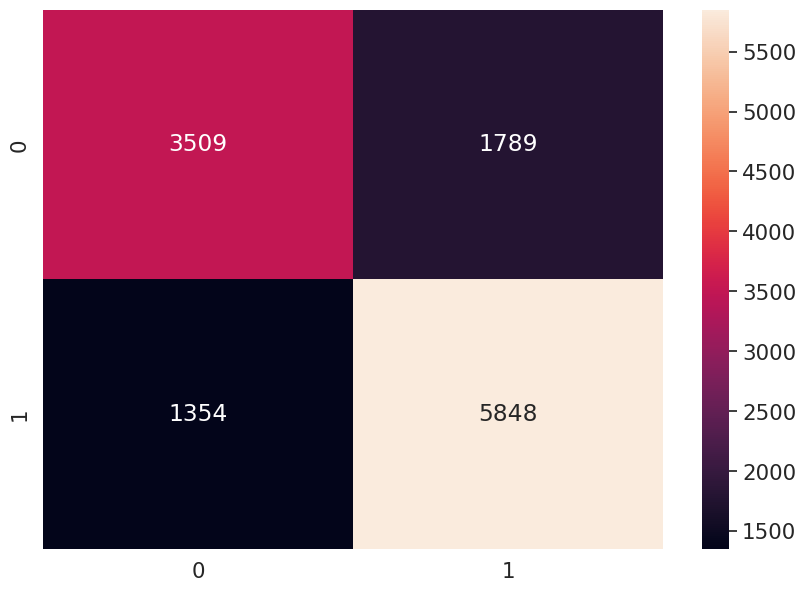

In [46]:
df_cm = pd.DataFrame(cm,index =(0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt ='g')

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv =10)
accuracies.mean()

0.7489866666666666

### Formatting the final result

In [49]:
final_res = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [50]:
final_res['predicted_result'] = y_pred
final_res[['user','enrolled','predicted_result']].reset_index(drop=True)

,user,enrolled,predicted_result
0,48024,1,0
1,266463,1,0
2,262169,1,0
3,213736,1,0
4,169082,1,1
...,...,...,...
12495,224853,1,1
12496,140477,0,0
12497,130283,1,1
12498,315152,1,1


# CONCLUSION

1. DIRECTING CUSTOMERS TO SUBSCRIPTION PRODUCTS THROUGH APP BEHAVIOR ANALYSIS

* Our efforts have given us a model that will label every new user as "highly likely" (or "unlikely") to subscribe. We can further validate our results by running our predictions on daily new installs, and see whether our accuracy is consistent. From there, we can narrow our marketing efforts only to those users "unlikely" to subscribe, and thus increase our subscription rate. 

* The increase in overall subscriptions can measure the benefit of this model to the company. Recall that those already likely to subscribe will do so, and, although we can still give them offers, we don't have to go all out. On the other hand, users who are likely to leave may convert to paid subscribers if we give them an offer they cannot refuse. For example, these offers can come in the form of 'Ist month free', or '50% off yearly subscriptions'. The latter shows that great offers can still be structured in a way that brings overall benefit to the company because we are locking the user in for an extended period!